## Hello Guys!

Here we are going to create a Convolution Neural Network(CNN) model on **Hoilday Season Prediction** ..

## Why CNN?

As we know that image classification involves extraction of features from the image to observe some patterns in the dataset.
The CNN follows a hierarchical model which works on building a network, like a funnel, and finally gives out a fully-connected layer(dense layer) where all the neurons are connected to each other and the output is processed.CNNs are very effective in reducing the number of parameters without losing on the quality of models. Images have high dimensionality (as each pixel is considered as a feature) which suits the above described abilities of CNNs.In CNN dimensionalty reduction is achieved using a sliding window with a size less than that of the input matrix. 

# Importing Libraries

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import os
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

# Getting The Dataset

In [2]:
df = pd.read_csv("../input/hackerearth-deep-learning-challenge-holidayseason/dataset/train.csv")

# Getting Analysis of Dataframe

In [3]:
df.head()

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


In [4]:
df['Class'].value_counts()

Miscellaneous     2801
Christmas_Tree    1539
Jacket             640
Candle             593
Airplane           535
Snowman            361
Name: Class, dtype: int64

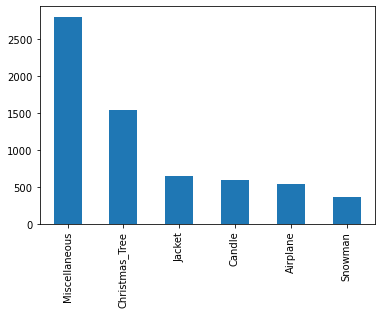

In [5]:
df['Class'].value_counts(sort=True).plot.bar()

# Getting the Images Folder Path

In [6]:
train_image = '../input/hackerearth-deep-learning-challenge-holidayseason/dataset/train'
test_image = '../input/hackerearth-deep-learning-challenge-holidayseason/dataset/test'

# Setting Input Image Size

In [7]:
image_size = [299, 299]

# Splitting Dataframe

In [8]:
train_df,valid_df = train_test_split(df,test_size=.15,stratify=df.Class.values,shuffle=True)


train_df.reset_index(inplace=True,drop=True)
valid_df.reset_index(inplace=True,drop=True)

## Training Dataframe

In [9]:
train_df.head()

,Image,Class
0,image1912.jpg,Candle
1,image8056.jpg,Snowman
2,image4109.jpg,Christmas_Tree
3,image847.jpg,Miscellaneous
4,image8282.jpg,Miscellaneous


In [10]:
train_df['Class'].value_counts()

Miscellaneous     2380
Christmas_Tree    1308
Jacket             544
Candle             504
Airplane           455
Snowman            307
Name: Class, dtype: int64

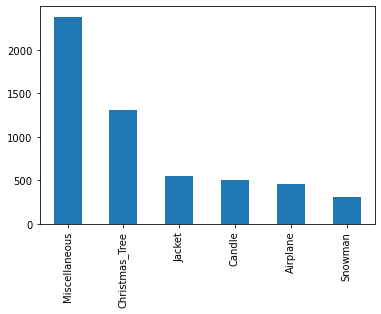

In [11]:
train_df['Class'].value_counts(sort=True).plot.bar()

## Validation Dataframe

In [12]:
valid_df.head()

,Image,Class
0,image2340.jpg,Miscellaneous
1,image8698.jpg,Christmas_Tree
2,image5923.jpg,Christmas_Tree
3,image3516.jpg,Miscellaneous
4,image1726.jpg,Miscellaneous


In [13]:
valid_df['Class'].value_counts()

Miscellaneous     421
Christmas_Tree    231
Jacket             96
Candle             89
Airplane           80
Snowman            54
Name: Class, dtype: int64

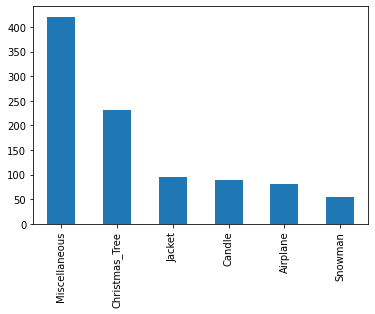

In [14]:
valid_df['Class'].value_counts(sort=True).plot.bar()

# Getting Images and Preprocesing 

### Lets we understand what ImageDataGenerator do...

This will run through image data and apply random transformations to each individual image as it is passed to the model so that it never sees the exact same image twice during training.<br/>
The benefit here is that the model will become more robust as it trains on images that are slightly distorted, and it helps to prevent the model from learning noise in the data such as where features are located in the image. 

## Getting Images for training

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_dataframe(dataframe=train_df, directory=train_image,
                                                 x_col="Image", y_col="Class",
                                                 class_mode="categorical",
                                                 target_size=(299,299), batch_size=32)

Found 5498 validated image filenames belonging to 6 classes.


# Getting Images for Validation

In [16]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_set = validation_datagen.flow_from_dataframe(dataframe=valid_df, directory=train_image,
                                                 x_col="Image", y_col="Class",
                                                 class_mode="categorical",
                                                 target_size=(299,299), batch_size=32)

Found 971 validated image filenames belonging to 6 classes.


# Getting The InceptionResNetV2 Model

Inception-ResNet-v2 is a variation of Inception V3 model, and it is considerably deeper than the previous Inception V3. Below in the figure is an easier to read version of the same network where the repeated residual blocks have been compressed. Here, notice that the inception blocks have been simplified, containing fewer parallel towers than the previous Inception V3. The Inception-ResNet-v2 architecture is more accurate than previous state of the art models.

In [17]:
incep = InceptionResNetV2(input_shape=image_size + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in incep.layers:
  layer.trainable = False  

x = Flatten()(incep.output)


prediction = Dense(6, activation='softmax')(x)

# create a model object
model = Model(inputs=incep.input, outputs=prediction)

# view the structure of the model
model.summary()

219062272/219055592 [==============================] - 2s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
____________________

activation_167 (Activation)     (None, 8, 8, 192)    0           batch_normalization_167[0][0]    
__________________________________________________________________________________________________
activation_170 (Activation)     (None, 8, 8, 256)    0           batch_normalization_170[0][0]    
__________________________________________________________________________________________________
block8_2_mixed (Concatenate)    (None, 8, 8, 448)    0           activation_167[0][0]             
                                                                 activation_170[0][0]             
__________________________________________________________________________________________________
block8_2_conv (Conv2D)          (None, 8, 8, 2080)   933920      block8_2_mixed[0][0]             
__________________________________________________________________________________________________
block8_2 (Lambda)               (None, 8, 8, 2080)   0           block8_1_ac[0][0]                
          

# Compile the model

In [18]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Fitting the model

In [19]:
r = model.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=12,
  steps_per_epoch=training_set.n//32,
  validation_steps=validation_set.n//32
)

Epoch 1/12
171/171 [==============================] - 160s 933ms/step - loss: 3.5143 - accuracy: 0.7805 - val_loss: 2.3850 - val_accuracy: 0.8490
Epoch 2/12
171/171 [==============================] - 137s 804ms/step - loss: 1.6976 - accuracy: 0.8782 - val_loss: 2.5097 - val_accuracy: 0.8427
Epoch 3/12
171/171 [==============================] - 135s 787ms/step - loss: 1.2418 - accuracy: 0.9074 - val_loss: 2.9009 - val_accuracy: 0.8417
Epoch 4/12
171/171 [==============================] - 134s 785ms/step - loss: 1.4812 - accuracy: 0.9065 - val_loss: 2.9227 - val_accuracy: 0.8781
Epoch 5/12
171/171 [==============================] - 132s 775ms/step - loss: 1.2525 - accuracy: 0.9283 - val_loss: 3.1136 - val_accuracy: 0.8552
Epoch 6/12
171/171 [==============================] - 132s 773ms/step - loss: 1.2966 - accuracy: 0.9290 - val_loss: 3.0316 - val_accuracy: 0.8865
Epoch 7/12
171/171 [==============================] - 131s 764ms/step - loss: 0.9677 - accuracy: 0.9426 - val_loss: 3.3018 -

### Thus we got validation accuracy of 88.65%.

# Ploting Loss and Accuracy

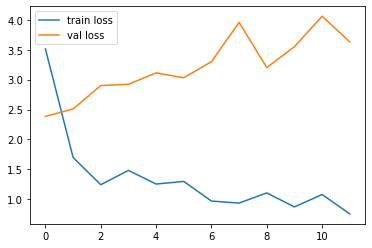

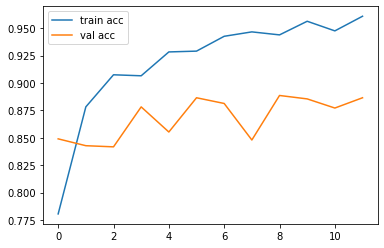

<Figure size 432x288 with 0 Axes>

In [20]:
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


# Getting Predictions for Test Data Images

In [21]:
name=[]
y_pred=[]
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
for i in os.listdir('../input/hackerearth-deep-learning-challenge-holidayseason/dataset/test/'):
    name.append(i)
    i='../input/hackerearth-deep-learning-challenge-holidayseason/dataset/test/'+i
    img=image.load_img(i,target_size=(299,299,3))
    img=image.img_to_array(img)/255
    pred=model.predict(img.reshape(1,299,299,3))
    y_pred.append(labels[np.argmax(pred[0])])
    
data=pd.DataFrame((zip(name,y_pred)),columns=['Image','Class'])
data.head()

,Image,Class
0,image7761.jpg,Airplane
1,image3202.jpg,Miscellaneous
2,image688.jpg,Snowman
3,image233.jpg,Candle
4,image4332.jpg,Christmas_Tree
